In [ ]:
# 1. Descriptive analytics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data0 = pd.read_csv('Census.csv')

In [ ]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569740 entries, 0 to 569739
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Person ID                  569740 non-null  int64  
 1   Region                     569740 non-null  object 
 2   Residence Type             569740 non-null  object 
 3   Family Composition         569740 non-null  int64  
 4   Population Base            569740 non-null  int64  
 5   Sex                        569740 non-null  int64  
 6   Age                        569740 non-null  int64  
 7   Marital Status             569740 non-null  int64  
 8   Student                    569740 non-null  int64  
 9   Country of Birth           569740 non-null  int64  
 10  Health                     569740 non-null  int64  
 11  Ethnic Group               569740 non-null  int64  
 12  Religion                   569740 non-null  int64  
 13  Economic Activity          56

In [ ]:
data0.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


In [ ]:
data0.isnull().sum()

Person ID                         0
Region                            0
Residence Type                    0
Family Composition                0
Population Base                   0
Sex                               0
Age                               0
Marital Status                    0
Student                           0
Country of Birth                  0
Health                            0
Ethnic Group                      0
Religion                          0
Economic Activity                 0
Occupation                        0
Industry                          0
Hours worked per week             0
No of hours                  302321
Approximated Social Grade         0
dtype: int64

In [ ]:
del data0['Person ID']

In [ ]:
region = {
    'Region': {
        'E12000001': 1,
        'E12000002': 2,
        'E12000003': 3,
        'E12000004': 4,
        'E12000005': 5,
        'E12000006': 6,
        'E12000007': 7,
        'E12000008': 8,
        'E12000009': 9,
        'W92000004': 10
    },
    'Residence Type': {
        'C': 1,
        'H': 0
    }
}

data0[['Region', 'Residence Type']] = data0[['Region', 'Residence Type']].apply(lambda x: x.map(region[x.name]))

In [ ]:
cat_dict = {
    'Region': {
    1: 'North East',
    2: 'North West',
    3: 'Yorkshire and the Humber',
    4: 'East Midlands',
    5: 'West Midlands',
    6: 'East of England',
    7: 'London',
    8: 'South East',
    9: 'South West',
    10: 'Wales'
    },
    'Residence Type': {
    1: 'Resident',
    0: 'Not resident'
    },
    'Family Composition': {
    1: 'Not in a family',
    2: 'Married/same-sex civil partnership',
    3: 'Cohabiting',
    4: 'Lone parent (male)',
    5: 'Lone parent (female)',
    6: 'Other related family',
    -9: 'No code required'
    },
    'Population Base': {
    1: 'Usual resident',
    2: 'Student living away',
    3: 'Short-term resident',
    },
    'Sex': {
    1: 'Male',
    2: 'Female',
    },
    'Age': {
    1:' 0 to 15',
    2: '16 to 24',
    3: '25 to 34',
    4: '35 to 44',
    5: '45 to 54',
    6: '55 to 64',
    7: '65 to 74',
    8: '75 and over'
    },
    'Marital Status': {
    1: 'Single',
    2: 'Married/same-sex civil partnership',
    3: 'Separated',
    4: 'Divorced',
    5: 'Widowed',
    },
    'Student': {
    1: 'Student',
    2: 'Not Student'
    },
    'Country of Birth': {
    1: 'UK',
    2: 'Non UK',
    -9: 'No Code required'
    },
    'Health': {
    1: 'Very good health',
    2: 'Good health',
    3: 'Fair health',
    4: 'Bad health',
    5: 'Very bad health',
    -9: 'No code required'
    },
    'Ethnic Group': {
    1: 'White',
    2: 'Mixed',
    3: 'Asian/Asian British',
    4: 'Black/Black British',
    5: 'Chinese/Other ethnic group',
    - 9: 'No code required'
    },
    'Religion': {
    1: 'No religion',
    2: 'Christian',
    3: 'Buddhist',
    4: 'Hindu',
    5: 'Jewish',
    6: 'Muslim',
    7: 'Sikh',
    8: 'Other religion',
    9: 'Not stated',
    -9: 'No code required'
    },
    'Economic Activity': {
    1: 'Employee',
    2: 'Self-employed',
    3: 'Unemployed',
    4: 'Full-time student',
    5: 'Retired',
    6: 'Student',
    7: 'Looking after home/family',
    8: 'Long-term sick/disabled',
    9: 'Other',
    -9: 'No code required'
    },
    'Occupation': {
    1: 'Managers/Directors/Senior Officials',
    2: 'Professional Occupations',
    3: 'Associate Professional/Technical',
    4: 'Administrative/Secretarial',
    5: 'Skilled Trades',
    6: 'Caring, Leisure/Other',
    7: 'Sales/Customer',
    8: 'Process/Plant/Machine Operatives',
    9: 'Elementary',
    -9: 'No code required'
    },
    'Industry': {
    1: 'Agriculture/forestry/fishing',
    2: 'Mining/quarrying/Manufacturing/Electricity/Other',
    3: 'Construction',
    4: 'Wholesale/retail/Repair',
    5: 'Accommodation',
    6: 'Transport/Information/communication',
    7: 'Financial/insurance/Intermediation',
    8: 'Real estate/Professional/scientific/Administrative',
    9: 'Public administration/defence/Other',
    10: 'Education',
    11: 'Health/social work',
    12: 'Other',
    -9: 'No code required'
    },
    'Hours worked per week': {
    1: 'P/t: 0-  15',
    2: 'P/t: 16 - 30',
    3: 'F/t: 31 - 48 ',
    4: 'F/t: 49 and more',
    -9:'No code required'
    },
    'Approximated Social Grade': {
    1: 'Higher & intermediate',
    2: 'Supervisory, clerical & junior ',
    3: 'Skilled manual occupations',
    4: 'Semi-skilled/unskilled manual occupations/Unemployed/lowest grade',
    -9: 'No code required'
    }
}

In [ ]:
cat_data =pd.DataFrame()
for c in cat_dict:
  cat_data[c] = data0[c].map(cat_dict[c])

In [ ]:
description2 = cat_data.describe().T
description2['freq %'] = (description2['freq'] / len(cat_data)) * 100
description2

,count,unique,top,freq,freq %
Region,569740,10,South East,88084,15.460385
Residence Type,569740,2,Not resident,559086,98.130024
Family Composition,569740,7,Married/same-sex civil partnership,300961,52.824271
Population Base,569740,3,Usual resident,561039,98.472812
Sex,569740,2,Female,289172,50.755081
Age,569740,8,0 to 15,106832,18.751009
Marital Status,569740,5,Single,270999,47.565381
Student,569740,2,Not Student,443203,77.790396
Country of Birth,569740,3,UK,485645,85.239758
Health,569740,6,Very good health,264971,46.507354


                                 -9      NaN     Total
Region                     0.000000  0.00000  1.000000
Residence Type             0.000000  0.00000  1.000000
Family Composition         0.033087  0.00000  0.966913
Population Base            0.000000  0.00000  1.000000
Sex                        0.000000  0.00000  1.000000
Age                        0.000000  0.00000  1.000000
Marital Status             0.000000  0.00000  1.000000
Student                    0.000000  0.00000  1.000000
Country of Birth           0.011942  0.00000  0.988058
Health                     0.011942  0.00000  0.988058
Ethnic Group               0.011942  0.00000  0.988058
Religion                   0.011942  0.00000  0.988058
Economic Activity          0.197666  0.00000  0.802334
Occupation                 0.263250  0.00000  0.736750
Industry                   0.263250  0.00000  0.736750
Hours worked per week      0.530630  0.00000  0.469370
No of hours                0.000000  0.53063  0.469370
Approximat

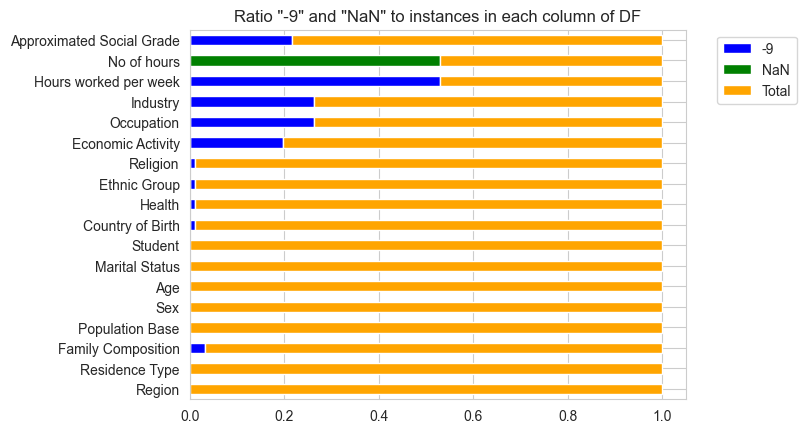

In [ ]:
No_code2 = data0[data0 == -9]
No_code_sum2 = No_code2.notnull().mean()
nan_hour = data0.isna().mean()
total_amount_column = 1 -(No_code_sum2 + nan_hour)

coun22 = pd.concat([No_code_sum2, nan_hour, total_amount_column], axis=1, keys=['-9', 'NaN', 'Total'])
print(coun22)

coun22.plot(kind='barh', stacked=True, title='Ratio "-9" and "NaN" to instances in each column of DF', color=['blue','green', 'orange'])
plt.legend(["-9", 'NaN', 'Total'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


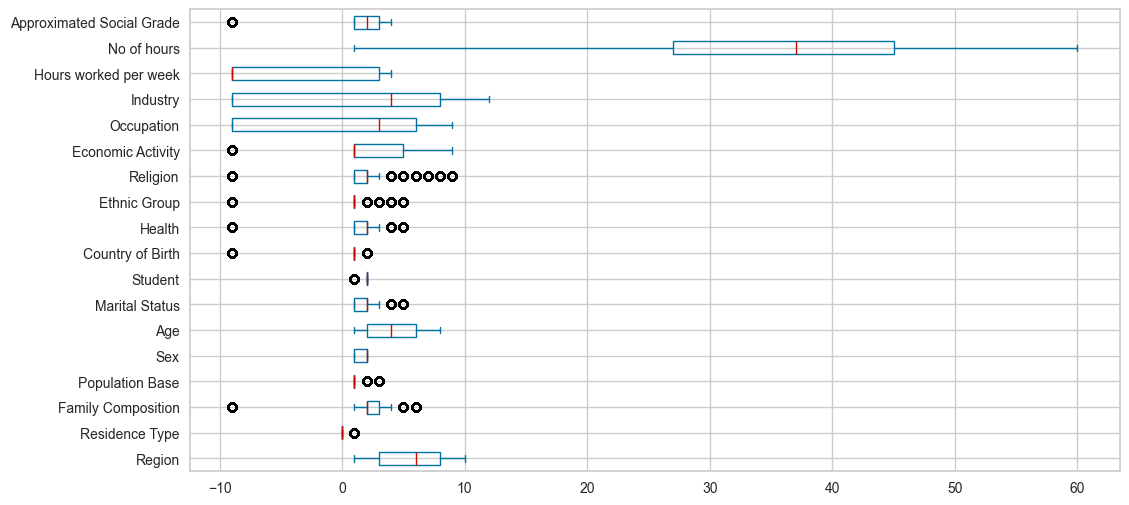

In [ ]:
data0.plot(kind='box', vert=False, figsize=(12, 6))
plt.show()

In [ ]:
pd.crosstab(cat_data['Region'], cat_data['Religion'])

Religion,Buddhist,Christian,Hindu,Jewish,Muslim,No code required,No religion,Not stated,Other religion,Sikh
Region,,,,,,,,,,
East Midlands,139,26733,896,29,1386,523,12399,3074,174,429
East of England,246,35051,546,323,1476,765,16374,4205,240,185
London,819,39992,4136,1498,10316,997,17062,7045,451,1266
North East,65,17537,59,50,460,248,6176,1630,77,47
North West,214,47316,388,298,3602,749,14168,4436,185,80
South East,447,52165,907,164,1977,1326,23798,6334,419,547
South West,189,31942,172,61,496,722,15638,4187,305,62
Wales,103,17612,109,17,442,335,9860,2358,116,24
West Midlands,158,33727,726,43,3772,611,12494,3735,275,1334


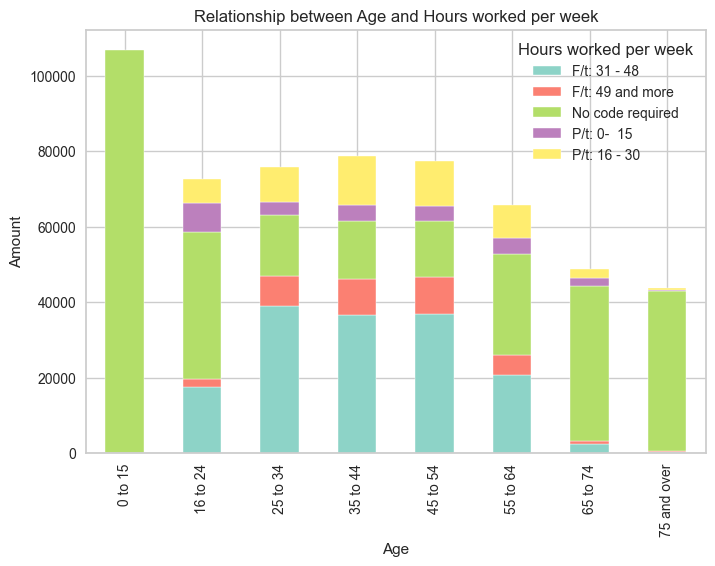

In [ ]:
cross_tab = pd.crosstab(cat_data['Age'], cat_data['Hours worked per week'])
cross_tab.plot(kind='bar', stacked=True, colormap='Set3')

plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Relationship between Age and Hours worked per week')
plt.show()

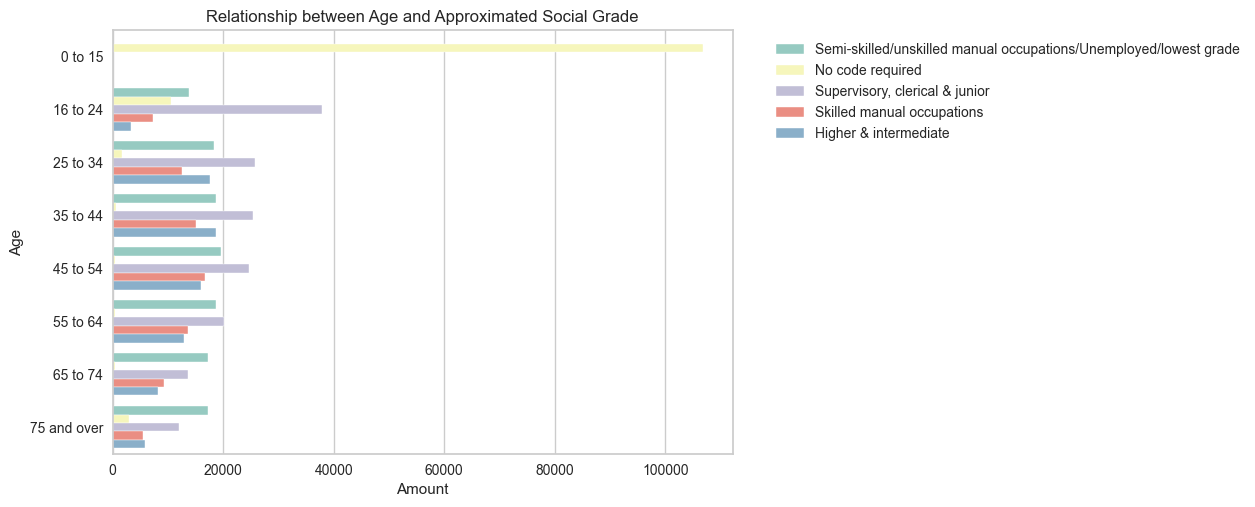

In [ ]:
age_order = [cat_dict['Age'][key] for key in sorted(cat_dict['Age'].keys())]
sns.countplot(y='Age', hue='Approximated Social Grade', data=cat_data, palette='Set3', order=age_order)
plt.ylabel('Age')
plt.xlabel('Amount')
plt.title('Relationship between Age and Approximated Social Grade')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
pearsoncorr=data0.corr(method='pearson')

<Axes: >

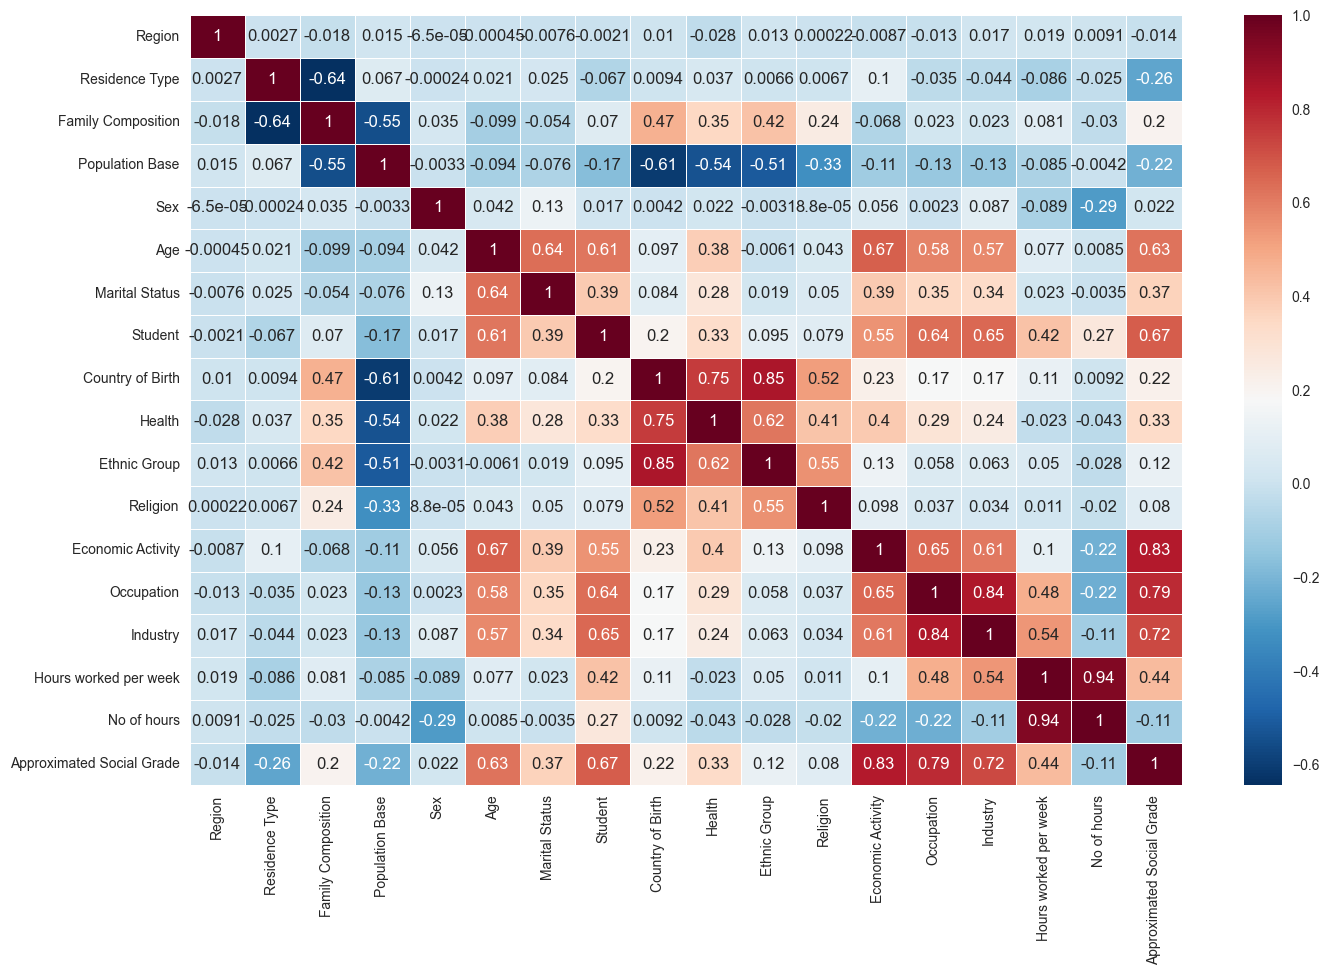

In [ ]:
import seaborn as sb
pearsoncorr=data0.corr(method='pearson')
fig, ax = plt.subplots(figsize=(16, 10))

sb.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
           ax=ax)

In [ ]:
valuecounts = {}

for item in cat_dict:
  valuecounts[item] = cat_data[item].value_counts(normalize=True)

for column, value_counts in valuecounts.items():
    print(f"Value counts for '{column}':\n{value_counts}\n\n")

Value counts for 'Region':
Region
South East                  0.154604
London                      0.146702
North West                  0.125384
East of England             0.104277
West Midlands               0.099826
South West                  0.094383
Yorkshire and the Humber    0.093852
East Midlands               0.080356
Wales                       0.054369
North East                  0.046247
Name: proportion, dtype: float64


Value counts for 'Residence Type':
Residence Type
Not resident    0.9813
Resident        0.0187
Name: proportion, dtype: float64


Value counts for 'Family Composition':
Family Composition
Married/same-sex civil partnership    0.528243
Not in a family                       0.169709
Cohabiting                            0.127499
Lone parent (female)                  0.113243
No code required                      0.033087
Lone parent (male)                    0.017285
Other related family                  0.010935
Name: proportion, dtype: float64


Value co

In [ ]:
data0['No of hours'].describe().T

count    267419.000000
mean         35.234789
std          13.520881
min           1.000000
25%          27.000000
50%          37.000000
75%          45.000000
max          60.000000
Name: No of hours, dtype: float64

In [ ]:
data0['No of hours'].value_counts().sort_index()

No of hours
1.0     1690
2.0     1742
3.0     1703
4.0     1699
5.0     1717
6.0     1776
7.0     1703
8.0     1722
9.0     1775
10.0    1693
11.0    1697
12.0    1758
13.0    1731
14.0    1640
15.0    1730
16.0    3518
17.0    3446
18.0    3459
19.0    3471
20.0    3514
21.0    3470
22.0    3430
23.0    3521
24.0    3417
25.0    3521
26.0    3472
27.0    3490
28.0    3446
29.0    3515
30.0    3443
31.0    8548
32.0    8467
33.0    8543
34.0    8663
35.0    8593
36.0    8477
37.0    8385
38.0    8642
39.0    8619
40.0    8623
41.0    8686
42.0    8642
43.0    8438
44.0    8525
45.0    8585
46.0    8501
47.0    8565
48.0    8435
49.0    2849
50.0    2999
51.0    3066
52.0    3064
53.0    3109
54.0    2954
55.0    2916
56.0    2934
57.0    2917
58.0    2974
59.0    2863
60.0    2928
Name: count, dtype: int64

In [ ]:
data0['No of hours'].isnull().sum()

302321

In [ ]:
data0['No of hours'].notnull().sum()

267419

In [ ]:
####################################################################
###### 2. Classification for the “Approximate Social Grade” ########
####################################################################

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.impute import SimpleImputer

In [ ]:
corr_work_hours = data0[['Hours worked per week', 'No of hours']].corr(method='pearson')

In [ ]:
corr_work_hours

,Hours worked per week,No of hours
Hours worked per week,1.000000,0.936231
No of hours,0.936231,1.000000


In [ ]:
cat = list(data0.columns)
data0[cat] = data0[cat].mask(data0[cat] == -9, pd.NA)

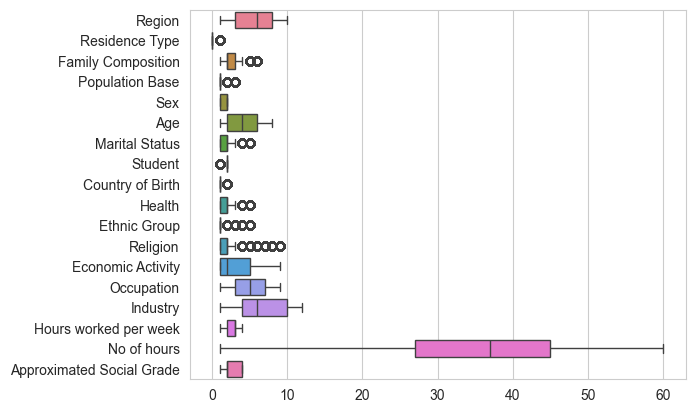

In [ ]:
ax = sns.boxplot(data=data0, orient='h')

In [ ]:
duplicate = data0[data0.duplicated()]
duplicate.shape

(172965, 18)

In [ ]:
data0.drop_duplicates(inplace=True)

<Axes: >

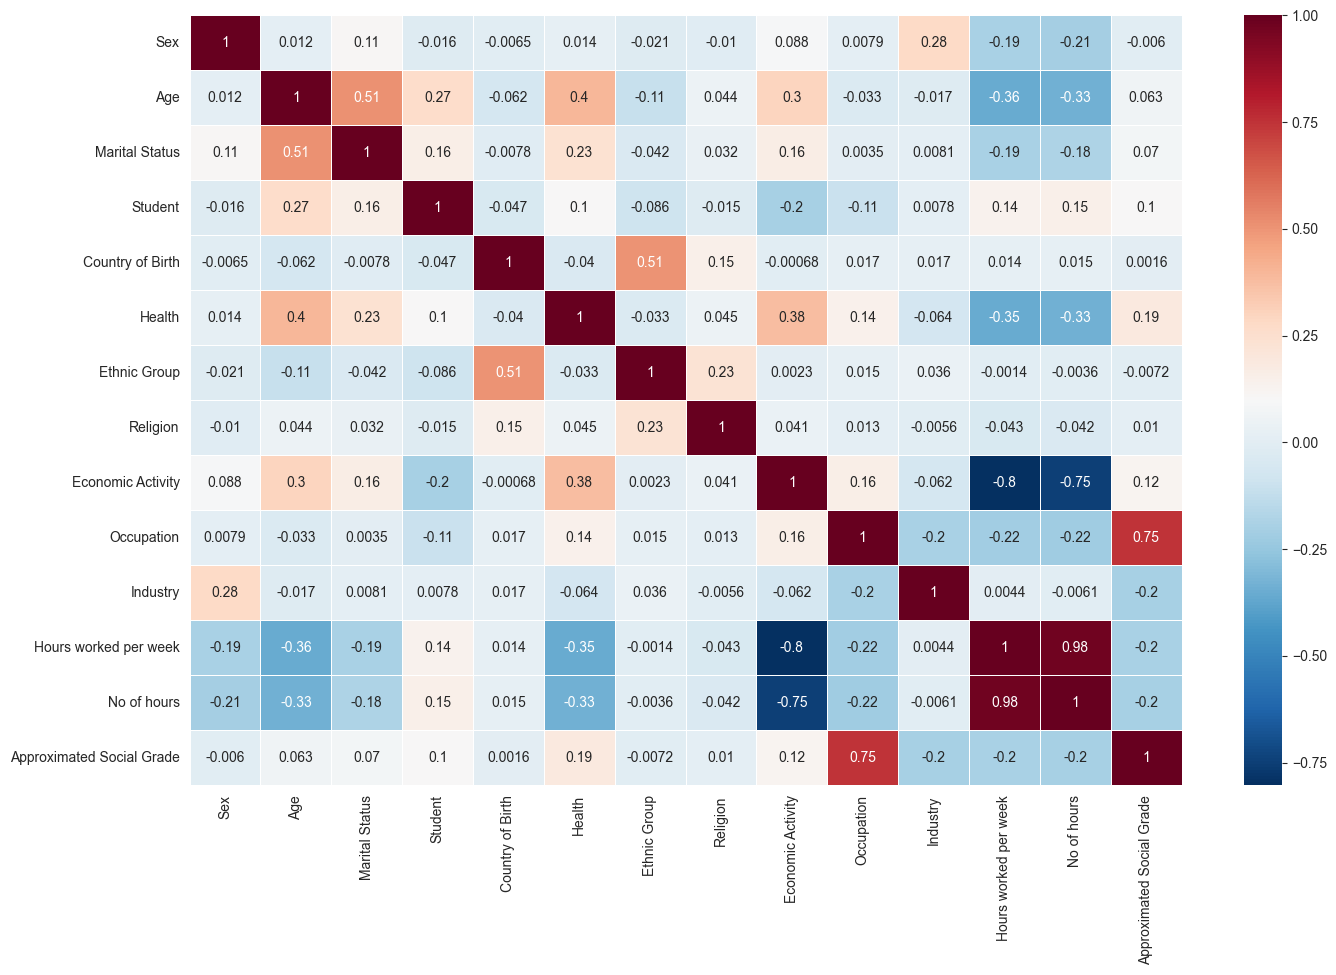

In [ ]:
import seaborn as sb
pearsoncorr=data0.corr(method='pearson')
fig, ax = plt.subplots(figsize=(16, 10))

sb.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
           ax=ax)

In [ ]:
fill_mode = ['No of hours', 'Hours worked per week']
data0[fill_mode] = data0[fill_mode].fillna(0)

In [ ]:
data0.dropna( inplace=True)

In [ ]:
del_columns = ['Region', 'Residence Type', 'Family Composition', 'Population Base']
data0.drop(columns=del_columns, inplace=True)

In [ ]:
import pandas as pd
data0 = pd.read_csv('Census_cleared.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import BaggingClassifier, HistGradientBoostingClassifier
from sklearn.impute import KNNImputer

In [ ]:
data1 = data0[(data0 != 0).all(axis=1)]

In [ ]:
X = data1.drop(columns=['Approximated Social Grade', 'No of hours'])
y = data1['Approximated Social Grade']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
############################################
#######    Decision tree classifier      ###
############################################

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

DT = DecisionTreeClassifier(random_state= 42)

DT.fit(X_train, y_train)
y_pred_dt = DT.predict(X_test)

print("Metrics:")
print(confusion_matrix(y_test, y_pred_dt), '\n')
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Report:\n", classification_report(y_test, y_pred_dt))

Metrics:
[[ 9151  2100     0     0]
 [ 2282 15314   210   432]
 [    0   225  8142  1595]
 [    0   455  1593  9174]] 

Accuracy: 0.8245219347581553
Report:
               precision    recall  f1-score   support

         1.0       0.80      0.81      0.81     11251
         2.0       0.85      0.84      0.84     18238
         3.0       0.82      0.82      0.82      9962
         4.0       0.82      0.82      0.82     11222

    accuracy                           0.82     50673
   macro avg       0.82      0.82      0.82     50673
weighted avg       0.82      0.82      0.82     50673



In [ ]:
# Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

RF = RandomForestClassifier(n_estimators=100, random_state=42)

RF.fit(X_train, y_train)
y_pred_rf = RF.predict(X_test)

print("Metrics:")
print(confusion_matrix(y_test, y_pred_rf), '\n')
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Report:\n", classification_report(y_test, y_pred_rf))

Metrics:
[[ 9159  2092     0     0]
 [ 1957 15607   212   462]
 [    0   161  8120  1681]
 [    0   359  1362  9501]] 

Accuracy: 0.8364809661950151
Report:
               precision    recall  f1-score   support

         1.0       0.82      0.81      0.82     11251
         2.0       0.86      0.86      0.86     18238
         3.0       0.84      0.82      0.83      9962
         4.0       0.82      0.85      0.83     11222

    accuracy                           0.84     50673
   macro avg       0.83      0.83      0.83     50673
weighted avg       0.84      0.84      0.84     50673



In [ ]:
# Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

print("Metrics:")
print(confusion_matrix(y_test, y_pred_lda), '\n')
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Classification Report:\n", classification_report(y_test, y_pred_lda))

Metrics:
[[ 8295  2956     0     0]
 [ 3621 13126   918   573]
 [    0   408  7286  2268]
 [    0   163  1812  9247]] 

Accuracy: 0.7489984804531012
Classification Report:
               precision    recall  f1-score   support

         1.0       0.70      0.74      0.72     11251
         2.0       0.79      0.72      0.75     18238
         3.0       0.73      0.73      0.73      9962
         4.0       0.76      0.82      0.79     11222

    accuracy                           0.75     50673
   macro avg       0.74      0.75      0.75     50673
weighted avg       0.75      0.75      0.75     50673



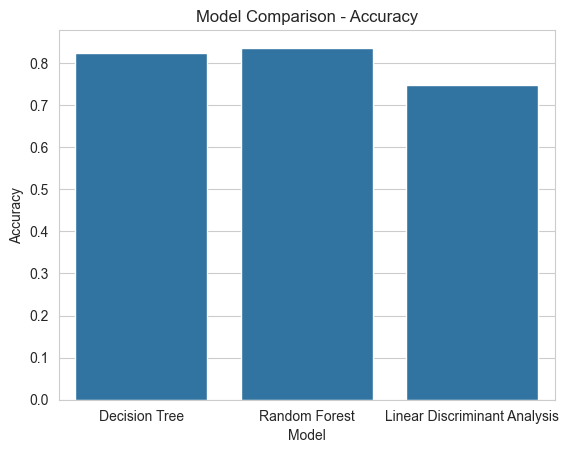

In [ ]:
results_df = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'Linear Discriminant Analysis'],
    'Accuracy': [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_lda)]})
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Comparison - Accuracy')
plt.show()

In [ ]:
#######################################################################
########     3. Regression on the “No of hours” attribute   ###########
#######################################################################

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import BaggingClassifier, HistGradientBoostingClassifier
from sklearn.impute import KNNImputer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [ ]:
data0 = pd.read_csv('Census_cleared.csv')

In [ ]:
correlation_matrix = data0.corr()
correlation_with_target = correlation_matrix['No of hours'].abs().sort_values(ascending=False)
print(correlation_with_target)

No of hours                  1.000000
Hours worked per week        0.975722
Economic Activity            0.751920
Health                       0.332855
Age                          0.332671
Occupation                   0.219592
Sex                          0.205357
Approximated Social Grade    0.198069
Marital Status               0.179616
Student                      0.149026
Religion                     0.042164
Country of Birth             0.014507
Industry                     0.006069
Ethnic Group                 0.003580
Name: No of hours, dtype: float64


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data0.values)
scaled_regr = pd.DataFrame(scaled_features, index=data0.index, columns=data0.columns)
scaled_regr.head()

,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,1.004095,0.816038,-0.043276,0.213080,-0.431796,0.142567,-0.345069,-0.243693,1.087416,1.196062,-1.429374,-1.345297,-1.250745,1.370001
1,-0.995922,1.405362,-0.043276,0.213080,-0.431796,-0.936463,-0.345069,-0.243693,1.087416,1.196062,-1.429374,-1.345297,-1.250745,-0.476280
2,1.004095,0.816038,1.760612,0.213080,-0.431796,1.221597,-0.345069,-0.243693,1.087416,1.576611,-0.503457,-1.345297,-1.250745,1.370001
3,1.004095,-1.541260,-0.945221,-4.693084,-0.431796,0.142567,-0.345069,-0.701026,0.640987,0.815512,-0.194819,-1.345297,-1.250745,-0.476280
4,-0.995922,1.405362,-0.043276,0.213080,-0.431796,1.221597,-0.345069,-0.243693,1.087416,1.576611,-1.429374,-1.345297,-1.250745,1.370001


In [ ]:
X = scaled_regr.drop(columns=['No of hours', 'Hours worked per week'])
y = scaled_regr['No of hours']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
######################################
##########   LinearRegression  #######
######################################

In [ ]:
# LinearRegression
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print("R2 score:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.4894413875490195
Mean Squared Error: 0.3842281440351138
Root Mean Squared Error: 0.6198613909860121 

R2 score: 0.6167420657475623


In [ ]:
################################################################
#####################    MLPRegressor    #######################
###############################################################

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.2395174588379402
Mean Absolute Error: 0.33661813188068945
R2 Score: 0.7610873437651327


In [ ]:
####################################################
#### 4. Association rule mining using Apriori  #####
####################################################

In [ ]:
import pandas as pd
data0 = pd.read_csv('/content/Census_cleared.csv')

In [ ]:
cat_data =pd.DataFrame()

for c in cat_dict:
    if c in data0.columns:
        cat_data[c] = data0[c].map(cat_dict[c])

In [ ]:
cat_data.dropna(inplace=True)

In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=7d240dcef1b0fc67100af667f399b96910c86f1159ff8a193f5be98d4ed240ee
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [ ]:
cat_data.shape

(253365, 13)

In [ ]:
data_list = []
for row in range(0, 253365):
    data_list.append([str(cat_data.values[row,column]) for column in range(0, 13)])

rules = apriori(data_list, min_support=0.25, min_confidence=0.25, min_length=2)
results = list(rules)

In [ ]:
df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

df['Items'] = list(map(set, Items))
df['Antecedent'] = list(map(set, Antecedent))
df['Consequent'] = list(map(set, Consequent))
df['Support'] = Support
df['Confidence'] = Confidence
df['Lift']= Lift

df.sort_values(by ='Lift', ascending = False, inplace = True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(1883, 6)

In [ ]:
above_1 = df[df["Lift"] > 1]

In [ ]:
above_1.shape

(1380, 6)

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
above_1.head(50)

,Items,Antecedent,Consequent,Support,Confidence,Lift
0,"{Married/same-sex civil partnership, White, Christian, Not Student, UK}","{Married/same-sex civil partnership, White}","{Christian, Not Student, UK}",0.254956,0.610033,1.267309
1,"{Married/same-sex civil partnership, White, Christian, Not Student, UK}","{Christian, Not Student, UK}","{Married/same-sex civil partnership, White}",0.254956,0.529657,1.267309
2,"{F/t: 31 - 48 , White, Not Student, Male, UK}","{Not Student, Male, White}","{F/t: 31 - 48 , UK}",0.273451,0.607293,1.255912
3,"{F/t: 31 - 48 , White, Not Student, Male, UK}","{F/t: 31 - 48 , UK}","{Not Student, Male, White}",0.273451,0.565511,1.255912
4,"{F/t: 31 - 48 , White, Not Student, Male, UK}","{Not Student, Male, UK}","{F/t: 31 - 48 , White}",0.273451,0.634745,1.253738
5,"{F/t: 31 - 48 , White, Not Student, Male, UK}","{F/t: 31 - 48 , White}","{Not Student, Male, UK}",0.273451,0.540117,1.253738
6,"{Employee, F/t: 31 - 48 , White, Not Student, Male}","{Employee, Male, White}","{Not Student, F/t: 31 - 48 }",0.251155,0.707894,1.241894
7,"{Employee, F/t: 31 - 48 , White, Not Student, Male}","{F/t: 31 - 48 , Not Student}","{Employee, Male, White}",0.251155,0.440615,1.241894
8,"{Married/same-sex civil partnership, White, Christian, Not Student, UK}","{Married/same-sex civil partnership, UK}","{Christian, Not Student, White}",0.254956,0.645557,1.241265
9,"{Married/same-sex civil partnership, White, Christian, Not Student, UK}","{Christian, Not Student, White}","{Married/same-sex civil partnership, UK}",0.254956,0.490225,1.241265


In [ ]:
unique_above_1 = above_1.drop_duplicates(subset=['Items'])

In [ ]:
unique_above_1.shape

(175, 6)

In [ ]:
unique_above_1.iloc[150:]

,Items,Antecedent,Consequent,Support,Confidence,Lift
1184,"{Not Student, Male, White}",{Not Student},"{Male, White}",0.450279,0.467504,1.011012
1198,"{Not Student, Good health}",{Not Student},{Good health},0.394293,0.409376,1.010448
1212,"{Not Student, Male, UK}","{Male, UK}",{Not Student},0.430805,0.971656,1.008825
1231,"{Employee, Good health}",{Employee},{Good health},0.329927,0.408290,1.007767
1237,"{Employee, UK}",{UK},{Employee},0.683642,0.814164,1.007540
1242,"{Female, White}",{Female},{White},0.415314,0.884289,1.007478
1246,"{Single, White}",{White},{Single},0.331060,0.377179,1.007273
1258,"{Female, Not Student, UK}","{Female, Not Student}",{UK},0.379950,0.845039,1.006375
1272,"{Christian, Not Student}",{Christian},{Not Student},0.557761,0.968449,1.005495
1280,"{Not Student, Male}",{Male},{Not Student},0.513532,0.968304,1.005345


In [ ]:
interest_ind = [6, 150, 286, 1082, 1258]
rules_5 = unique_above_1.loc[interest_ind].copy()

In [ ]:
print(rules_5)

,Items,Antecedent,Consequent,Support,Confidence,Lift
6,"{Employee, F/t: 31 - 48 , White, Not Student, Male}","{Employee, Male, White}","{Not Student, F/t: 31 - 48 }",0.251155,0.707894,1.241894
150,"{Christian, Female, White}","{Female, White}",{Christian},0.269126,0.648005,1.125142
286,"{Supervisory, clerical & junior , White, UK}",{UK},"{Supervisory, clerical & junior , White}",0.291678,0.347366,1.098522
1082,"{F/t: 31 - 48 , White, Very good health}",{F/t: 31 - 48 },"{Very good health, White}",0.251669,0.436611,1.018384
1258,"{Female, Not Student, UK}","{Female, Not Student}",{UK},0.379950,0.845039,1.006375


In [ ]:
################################################
######   5. Clustering using 2 algorithms   ####
################################################

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import BaggingClassifier, HistGradientBoostingClassifier
from sklearn.impute import KNNImputer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [ ]:
data0 = pd.read_csv('Census_cleared.csv')

In [ ]:
data0_sample = data0.sample(frac=0.2, random_state=42)

In [ ]:
data0_sample = data0_sample.drop('No of hours', axis=1)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data0_sample.values)
scaled_data0 = pd.DataFrame(scaled_features, index=data0_sample.index, columns=data0_sample.columns)

In [ ]:
############################   DBSCAN   #############################

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_data0)

print(labels)

[   0   -1    1 ...  573 1109   -1]


In [ ]:
scaled_data0.shape

(72478, 13)

In [ ]:
nbrs = NearestNeighbors(n_neighbors = 5).fit(scaled_data0)
neigh_dist, neigh_ind = nbrs.kneighbors(scaled_data0)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

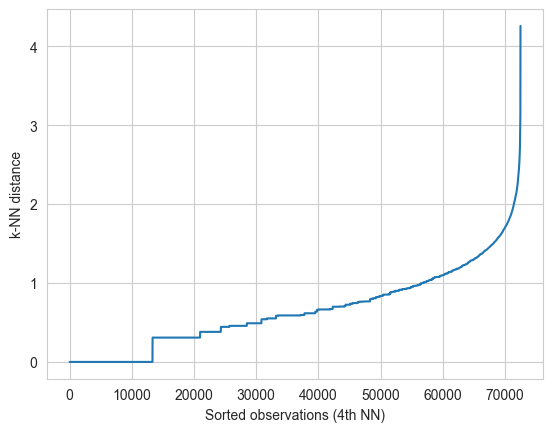

In [ ]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [ ]:
!pip install kneed

DEPRECATION: colab 1.13.5 has a non-standard dependency specifier pytz>=2011n. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of colab or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

print(kneedle.knee_y)

2.7075460453959237


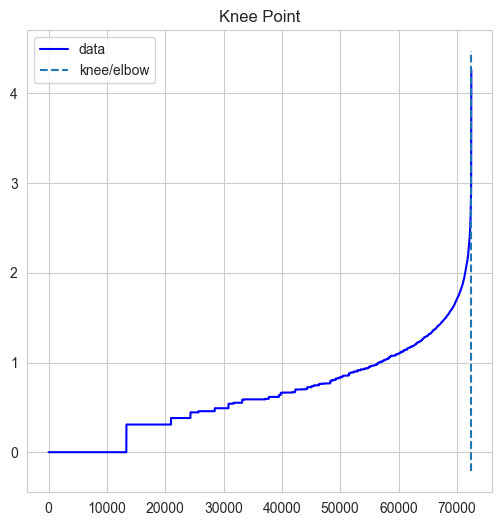

In [ ]:
kneedle.plot_knee()
plt.show()

In [ ]:
len(scaled_data0.keys())

13

In [ ]:
dbscan = DBSCAN(eps = 2.7, min_samples = 26)
cluster_labels = dbscan.fit_predict(scaled_data0)

In [ ]:
cluster_counts = Counter(cluster_labels)

for cluster, count in cluster_counts.items():
    print(f'Cluster {cluster}: {count} instances')

Cluster 0: 58689 instances
Cluster 1: 10578 instances
Cluster 2: 2408 instances
Cluster 3: 712 instances
Cluster -1: 91 instances


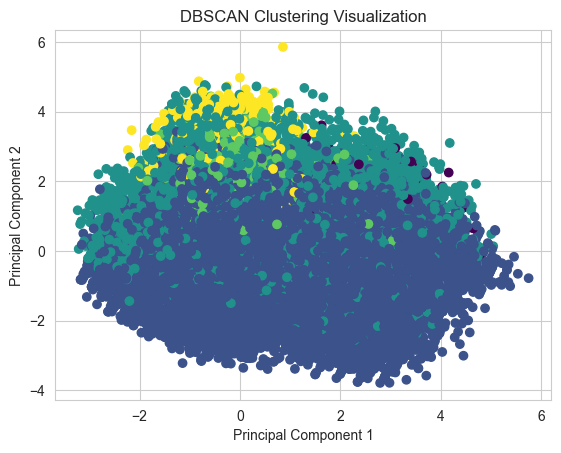

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data0)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data0, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2124113715985302


In [ ]:
#########################  KMeans  #####################################

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data0 = pd.read_csv('Census_cleared.csv')

In [ ]:
data0_sample = data0.sample(frac=0.2, random_state=42)

In [ ]:
data0_sample = data0_sample.drop('No of hours', axis=1)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data0_sample.values)
scaled_data0 = pd.DataFrame(scaled_features, index=data0_sample.index, columns=data0_sample.columns)

In [ ]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: colab 1.13.5 has a non-standard dependency specifier pytz>=2011n. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of colab or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


C:\Users\kremn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kremn\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kremn\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\kremn\AppData\Local\Programs\Python\Python310\lib\site-packages\

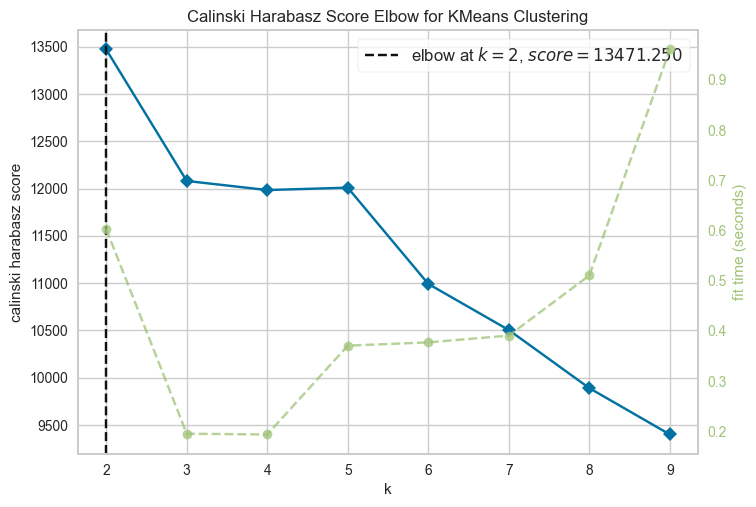

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(scaled_data0)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(scaled_data0)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[-0.0123452 , -0.60672761, -0.32279349, -1.30552162,  1.20839153,
        -0.26587307,  1.91409496,  0.59928669,  0.1739914 ,  0.16191153,
         0.06690452, -0.13802607, -0.13610105],
       [-0.08017784, -0.25384305, -0.16546149,  0.21333446, -0.19276569,
        -0.28260145, -0.31890936, -0.14982844, -0.60806751, -0.14105262,
         0.02202388,  0.5875465 , -0.10119852],
       [ 0.1911873 ,  0.90713883,  0.55264569,  0.20296347, -0.19867827,
         0.79211291, -0.28346411,  0.02633861,  1.30765796,  0.23870186,
        -0.08628963, -1.27952922,  0.30539718]])

In [ ]:
kmeans_silhouette = silhouette_score(scaled_data0.values, kmeans.labels_).round(2)
kmeans_silhouette

0.21

In [ ]:
scaled_data0.shape

(362391, 14)

In [ ]:
scaled_data0['cluster'] = kmeans.labels_

In [ ]:
scaled_data0['cluster'].value_counts() / len(scaled_data0) * 100

cluster
0    64.726773
2    30.931232
1     4.341995
Name: count, dtype: float64

In [ ]:
#view proterties of each cluster
cluster1=scaled_data0.query("cluster == 0")
cluster2=scaled_data0.query("cluster == 1")
cluster3=scaled_data0.query("cluster == 2")

In [ ]:
cluster1.head()

,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster
460,-0.995922,-1.54126,-0.945221,0.21308,-0.431796,-0.936463,-0.345069,-0.243693,0.194558,-0.706687,0.731098,-1.345297,-1.250745,-0.47628,0
480,-0.995922,-1.54126,-0.945221,0.21308,-0.431796,-0.936463,-0.345069,-0.243693,0.194558,0.054412,0.422459,-1.345297,-1.250745,-0.47628,0
701,-0.995922,-1.54126,-0.945221,0.21308,-0.431796,-0.936463,-0.345069,2.957643,0.194558,-0.706687,0.422459,-1.345297,-1.250745,-1.39942,0
1013,1.004095,-1.54126,-0.945221,0.21308,-0.431796,-0.936463,-0.345069,-0.701026,0.194558,0.054412,-0.503457,-1.345297,-1.250745,-1.39942,0
1058,-0.995922,-1.54126,-0.945221,0.21308,-0.431796,-0.936463,-0.345069,-0.701026,0.194558,1.576611,-0.812096,-1.345297,-1.250745,-1.39942,0


In [ ]:
cluster2.head()

,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster
3,1.004095,-1.541260,-0.945221,-4.693084,-0.431796,0.142567,-0.345069,-0.701026,0.640987,0.815512,-0.194819,-1.345297,-1.250745,-0.47628,1
22,-0.995922,-1.541260,2.662556,-4.693084,-0.431796,-0.936463,-0.345069,-0.701026,0.640987,0.054412,-0.503457,-1.345297,-1.250745,-0.47628,1
82,1.004095,-1.541260,-0.945221,-4.693084,-0.431796,-0.936463,-0.345069,-0.243693,0.640987,-0.326137,1.657014,-1.345297,-1.250745,-0.47628,1
103,1.004095,0.226713,-0.043276,-4.693084,-0.431796,3.379657,-0.345069,-0.701026,1.533845,1.576611,0.422459,-1.345297,-1.250745,0.44686,1
158,1.004095,-1.541260,-0.945221,-4.693084,-0.431796,-0.936463,-0.345069,-0.701026,0.640987,0.434962,1.348375,-1.345297,-1.250745,-0.47628,1


In [ ]:
cluster3.head()

,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster
0,1.004095,0.816038,-0.043276,0.21308,-0.431796,0.142567,-0.345069,-0.243693,1.087416,1.196062,-1.429374,-1.345297,-1.250745,1.370001,2
1,-0.995922,1.405362,-0.043276,0.21308,-0.431796,-0.936463,-0.345069,-0.243693,1.087416,1.196062,-1.429374,-1.345297,-1.250745,-0.476280,2
2,1.004095,0.816038,1.760612,0.21308,-0.431796,1.221597,-0.345069,-0.243693,1.087416,1.576611,-0.503457,-1.345297,-1.250745,1.370001,2
4,-0.995922,1.405362,-0.043276,0.21308,-0.431796,1.221597,-0.345069,-0.243693,1.087416,1.576611,-1.429374,-1.345297,-1.250745,1.370001,2
5,-0.995922,1.994687,-0.043276,0.21308,-0.431796,1.221597,-0.345069,-0.243693,1.087416,0.054412,-1.429374,-1.345297,-1.250745,0.446860,2


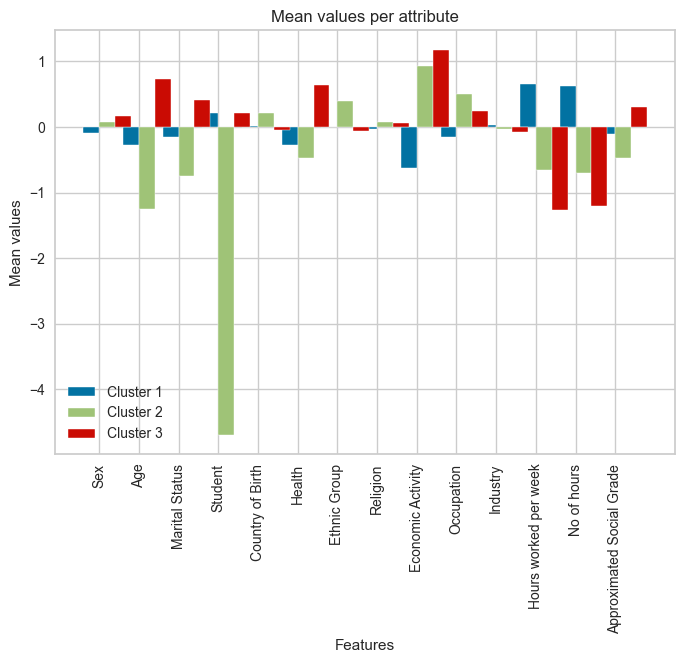

In [ ]:
X = cluster1.columns[:-1]

cluster1_mean = kmeans.cluster_centers_[0]
cluster2_mean = kmeans.cluster_centers_[1]
cluster3_mean = kmeans.cluster_centers_[2]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean, 0.4, label='Cluster 1')
plt.bar(X_axis + 0.2, cluster2_mean, 0.4, label='Cluster 2')
plt.bar(X_axis + 0.6, cluster3_mean, 0.4, label='Cluster 3')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()
